
<h1 align="center">Heart Failure Prediction</h1>

<h4 align="center">Domain: Healthcare and Medical Research</h4>





---
###Description

Heart failure, also known as congestive heart failure, is a long-term condition that occurs when the heart can't pump enough blood to meet the body's needs. This can happen when the heart becomes too weak or stiff, or if it can't fill up with enough blood. Heart failure can affect people of any age. People who have or are at risk of cardiovascular disease need early detection and management and a learning model can assist in this.

This dataset contains clinical records of patients who were diagnosed with heart failure, collected in 2015. The data is intended to aid in the prediction of heart failure outcomes, based on various clinical and demographic features. It includes 12 features collected during follow-up visits that can be used to predict mortality by heart failure. Given the objective is to predict a binary outcome (DEATH_EVENT 0=No 1=Yes) the problem is going to be a classification problem. Specifically a binary classification problem to predict one of two possible outcomes.
<br><br>
Dataset Name: Heart Failure Prediction
<br><br>
Source: The dataset is sourced from Kaggle [link](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data)
<br><br>
Citation: Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). ([link](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5))

---
###Objective

To develop a predictive model to identify patients at risk of heart failure. By analyzing the clinical features, the model can help healthcare providers take preventive measures and improve patient outcomes:

1.   Identify key clinical indicators that are predictive of heart failure
2.   Evaluate different machine learning models to find a most accurate predictor
3.   Provide actionable insights for healthcare providers to improve management and preventive care for patients


---
###Strategic Plan of Action

We aim to meet the objective by following these necessary steps:

- Data Exploration
- Data Pre-processing
- Exploratory Data Analysis (EDA)
- Feature Selection
- Model Selection
- Hyperparameter Tuning
- Evaluation

---
###<h2>Explanation of Each Column</h2>

| Column Name       | Description                                              | Data Type | Notes                               |
|-------------------|----------------------------------------------------------|-----------|-------------------------------------|
| age               | Age of the patient                                       | Float   | Years                               |
| anaemia           | Presence of anemia                                       | Integer   | 1: Yes, 0: No                       |
| creatinine_phosphokinase | Level of the CPK enzyme in the blood                 | Integer   | mcg/L                               |
| diabetes          | Presence of diabetes                                     | Integer   | 1: Yes, 0: No                       |
| ejection_fraction | Percentage of blood leaving the heart with each contraction | Integer   | Percentage                          |
| high_blood_pressure | Presence of high blood pressure                        | Integer   | 1: Yes, 0: No                       |
| platelets         | Platelet count in the blood                              | Float     | kiloplatelets/mL                    |
| serum_creatinine  | Level of serum creatinine in the blood                   | Float     | mg/dL                               |
| serum_sodium      | Level of serum sodium in the blood                       | Integer   | mEq/L                               |
| sex               | Gender of the patient                                    | Integer   | 1: Male, 0: Female                  |
| smoking           | Smoking status                                           | Integer   | 1: Yes, 0: No                       |
| time              | Follow-up period (days)                                  | Integer   | Days                                |
| DEATH_EVENT       | Death event (target variable)                            | Integer   | 1: Yes, 0: No                       |


---
###Data Exploration

In [1]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from joblib import dump, load
from scipy import stats
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Healthcare_Heart.csv')

In [2]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0



The dataset is composed of 299 rows and 13 columns

####Dataframe Information - dtypes

In [3]:
# Dataframe Information
print("Dataframe Information:")
print(df.info())

Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.

#####Summary
---

Features and target are float or integer.

####Descriptive Statistics

In [4]:
# Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())
print()

Descriptive Statistics:
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            3


#####Summary
---

Age distribution has a mean or average age of patients at around 60.83 years old, suggesting the dataset covers a range of adult age groups. There is a standard deviation of ~11.89 years, suggesting some diversity in the ages of patients. The range is age 40-95 years old; a broad range.

There is a prevalence of health conditions: Anaemia ~43% of patients, diabetes ~42% of patients, and high blood pressure ~35% of patients with these conditions.

Clinical measurements: The average ejection fraction (measures percentage of blood leaving the heart with each contraction) is ~38.08% which is important in assessing heart function. Serum Creatinine is ~1.39 mg/dL with a standard deviation of 1.03 showing variability in kidney function markers among patients. The average serum sodium level is ~136.63 mEq/L with a standard deviation of 4.41. The average platelet count is 263,358 kiloplatelets/mL with a noteworthy standard deviation of 97,804 indicating variability in these levels among patients.

Demographics: The dataset is mostly male patients (64.88%). Around 32.11% of patients are smokers.

Follow-up period: The mean time is ~130.26 days with a range of 4-285 days. This may assist in understanding how long patients were monitored during the study.

Outcome variable: Death. The dataset includes patients with both outcomes. Around 32% experienced a death event (DEATH_EVENT=1) and around 68% did not.

####Unique Value Check

In [5]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'{column}: {unique_values[:10]}')  # Print first 10 unique values


age: [75. 55. 65. 50. 90. 60. 80. 62. 45. 49.]
anaemia: [0 1]
creatinine_phosphokinase: [ 582 7861  146  111  160   47  246  315  157  123]
diabetes: [0 1]
ejection_fraction: [20 38 40 15 60 65 35 25 30 50]
high_blood_pressure: [1 0]
platelets: [265000.   263358.03 162000.   210000.   327000.   204000.   127000.
 454000.   388000.   368000.  ]
serum_creatinine: [1.9 1.1 1.3 2.7 2.1 1.2 1.5 9.4 4.  0.9]
serum_sodium: [130 136 129 137 116 132 131 138 133 140]
sex: [1 0]
smoking: [0 1]
time: [ 4  6  7  8 10 11 12 13 14 15]
DEATH_EVENT: [1 0]


#####Summary
---

Binary categorical features are anaemia, diabetes, high_blood_pressure, sex, smoking, DEATH_EVENT (target).

Numeric/Continuous numeric features are age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time.


####Binary Value Counts

In [6]:
# Get value counts for binary categorical columns
binary_categorical_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

for column in binary_categorical_columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print()

Value counts for anaemia:
anaemia
0    170
1    129
Name: count, dtype: int64

Value counts for diabetes:
diabetes
0    174
1    125
Name: count, dtype: int64

Value counts for high_blood_pressure:
high_blood_pressure
0    194
1    105
Name: count, dtype: int64

Value counts for sex:
sex
1    194
0    105
Name: count, dtype: int64

Value counts for smoking:
smoking
0    203
1     96
Name: count, dtype: int64

Value counts for DEATH_EVENT:
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64



#####Summary
---
There is a class imbalance for target, DEATH_EVENT. This may require class weighting in algorithms to handle imbalance.

Binary Features are fairly balanced for anaemia and diabetes; less so for high_blood_pressure and smoking.

---
###Data Preprocessing

####Check for Missing Values

In [7]:
# Check for missing values
missing_values = df.isnull().sum().sum()
print()
if missing_values == 0:
    print("There are no missing values in the DataFrame.")
else:
    print(f"There are {missing_values} missing values in the DataFrame.")
print()


There are no missing values in the DataFrame.



#####Summary
---
There are no missing values in the dataframe.

####Check for Duplicates

In [8]:
#Check for duplicates
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found in the DataFrame:")
    print(duplicate_rows)
else:
    print("No duplicate rows found in the DataFrame.")
print()

No duplicate rows found in the DataFrame.



#####Summary
---
There are no duplicate rows found in the dataframe.

####Outlier Removal

In [9]:
# Select continuous numerical columns for outlier removal
outlier_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
                'serum_creatinine', 'serum_sodium', 'time']

# Remove outliers directly from the original DataFrame
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0


#####Summary
---
Outliers may disproportionately affect the performance of some models and removing them may improve model accuracy and stability. Outliers also may skew distribution and/or violate assumptions leading to inaccurate predictions.


####Scale Numerical Features

In [10]:
# 'features' is a list of feature numerical columns
features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Create the scaler
scaler = StandardScaler()  # or MinMaxScaler()

# Fit and transform the features
df[features] = scaler.fit_transform(df[features])

# The target variable should remain unscaled
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.190537,0,0.878670,0,-1.555768,1,0.136333,2.358663,-1.854716,1,0,-1.683733,1
2,0.351568,0,-0.684634,0,-1.555768,0,-1.400896,0.524147,-2.117996,1,1,-1.644471,1
3,-0.906886,1,-0.810128,0,-1.555768,0,-0.684517,2.358663,-0.011754,1,0,-1.644471,1
5,2.448991,1,-1.039604,0,0.155882,1,-0.774065,2.970169,-1.328155,1,1,-1.631383,1
6,1.190537,1,-0.326078,0,-1.983680,0,-1.923255,0.218395,-0.011754,1,0,-1.605208,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,-0.067917,0,-0.060746,0,-0.272030,0,-1.833708,0.829900,0.514807,1,0,1.640498,0
292,-0.739092,0,-0.526869,1,-0.015283,0,1.882506,-0.393111,0.778087,1,1,1.640498,0
293,0.183774,1,-0.838813,1,-0.272030,0,-1.147179,-0.698863,-0.275034,1,1,1.797548,0
294,0.099877,0,-0.989406,1,-0.015283,1,-1.505368,-0.087358,1.567928,1,1,1.797548,0


#####Summary
---
Numerical features are scaled as a model is sensitive to the scale. It helps the model perform better and converge faster. We do not scale the target or categorical/binary features.

---
###Exploratory Data Analysis (EDA)

####Histograms

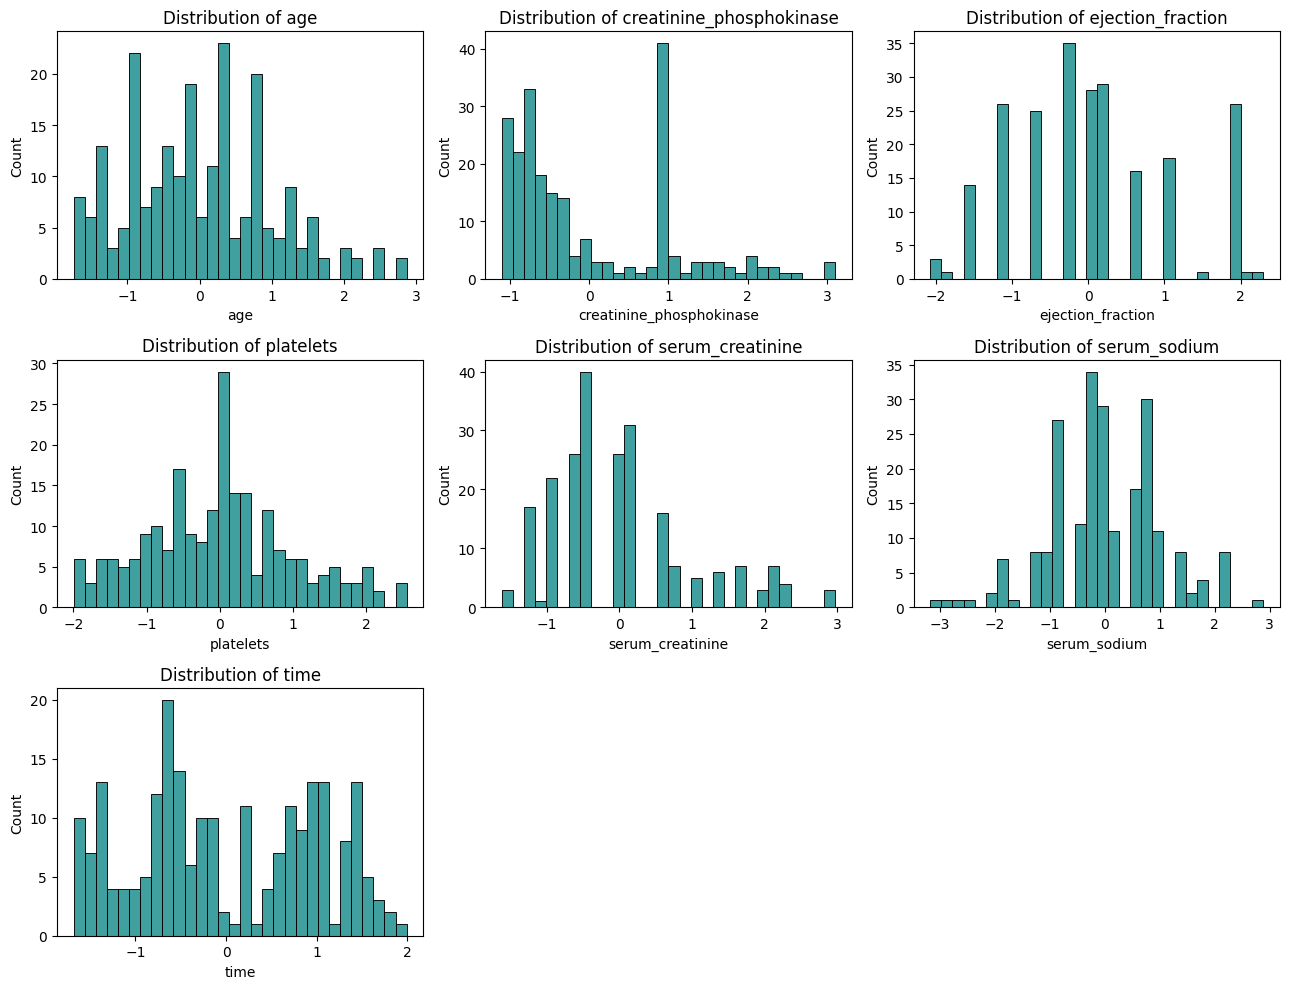

In [11]:
# Create histograms for each scaled feature
plt.figure(figsize=(13, 10))  # Adjust figure size as needed

# Determine the number of rows and columns needed
num_features = len(features)
rows = (num_features // 3) + (num_features % 3 > 0)  # Adjust rows based on the number of features

for i, feature in enumerate(features):
    plt.subplot(rows, 3, i + 1)  # 3 columns; `rows` rows
    sns.histplot(data=df, x=feature, bins=30, color='#008080')  # Teal color
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#####Summary
---
The features have been scaled and should be distributed around a mean of 0 with a standard deviation of 1. Thus, these histograms are going to range typically from -3 to 3 and can be interpreted as follows:
- 0: Mean of the original data
- 1: 1 standard deviation above the mean
- -1: 1 standard deviation below the mean
- 2: 2 standard deviations above the mean
- -2: 2 standard deviations below the mean

Age has multiple peaks indicating several common age ranges in the data. Creatinine Phosphokinase has a long right tail meaning that most values are clustered at the lower end with a few high values extending far to the right; rare but may be significant - if patients with high values are more likely to have a death event, this could be an important predictor. Serum sodiuim with a longer left tail means most values are clustered at higher levels and if low sodium levels are associated with death evenets, this could be relevant.

####Correlation Matrix

Correlation Summaries:
DEATH_EVENT and ejection_fraction: There is a moderate correlation (-0.3055).
DEATH_EVENT and serum_creatinine: There is a moderate correlation (0.3485).
smoking and sex: There is a moderate correlation (0.4731).
DEATH_EVENT and time: There is a moderate correlation (-0.5079).


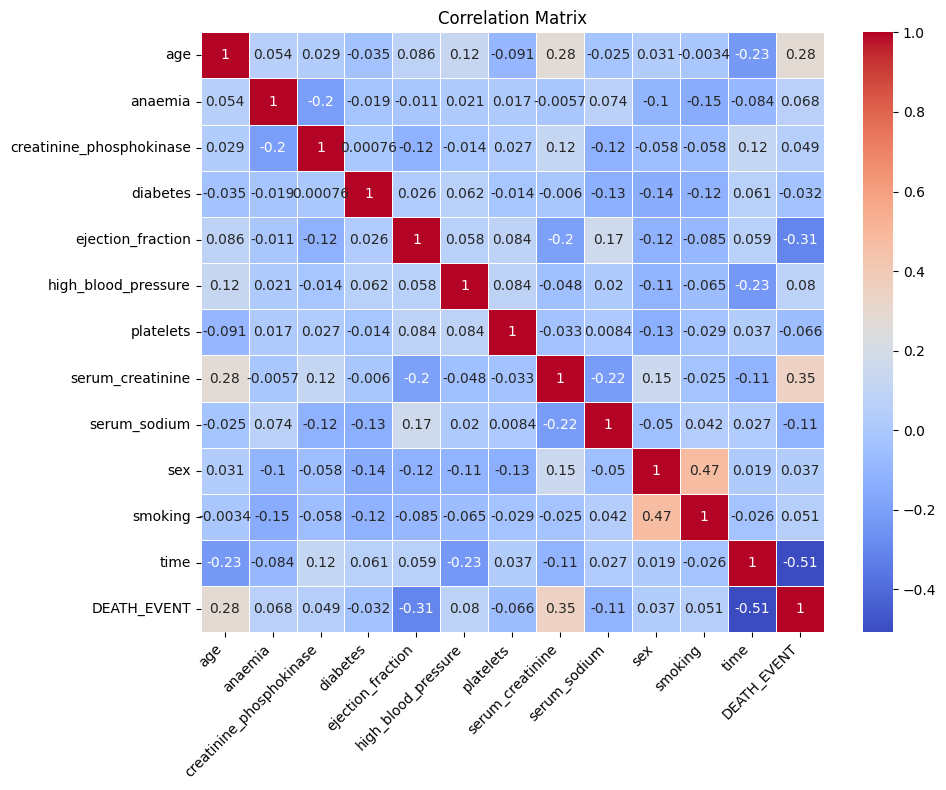

In [12]:
# Correlation matrix
corr_matrix = df.corr()

# Define thresholds for interpreting correlations
moderate_corr_threshold = 0.3
high_corr_threshold = 0.6

# Function to summarize correlations
def summarize_correlations(corr_matrix):
    print("Correlation Summaries:")
    visited_pairs = set()  # To keep track of visited pairs
    for i, col in enumerate(corr_matrix.columns):
        for j, row in enumerate(corr_matrix.index):
            if i != j:  # Exclude self-correlation (diagonal elements)
                pair = tuple(sorted([row, col]))  # Sort pair to avoid duplicate output
                if pair not in visited_pairs:
                    visited_pairs.add(pair)
                    correlation = corr_matrix.loc[row, col]  # Access correlation value
                    if abs(correlation) >= high_corr_threshold:
                        print(f"{row} and {col}: There is a high correlation ({correlation:.4f}).")
                    elif abs(correlation) >= moderate_corr_threshold:
                        print(f"{row} and {col}: There is a moderate correlation ({correlation:.4f}).")

# Print correlation summaries
summarize_correlations(corr_matrix)

# Visualize correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print()

#####Summary
---
As the ejection fraction (a measure of how well the heart is pumping) decreases, the likelihood of a death event increases. A lower ejection fraction could indicate a weaker heart function, which may lead to higher mortality.

Higher levels of serum creatinine, which indicates kidney function, are associated with a higher likelihood of a death event. Elevated serum creatinine can be a sign of kidney dysfunction, which is often linked to worse outcomes in heart failure patients.

There is a moderate correlation between smoking and sex, suggesting that one gender (likely males, given general trends) is more likely to smoke. This relationship might reflect social or biological factors that influence smoking behavior.

A longer time (likely indicating the duration since diagnosis or treatment) is associated with a lower likelihood of a death event. This could imply that patients who survive longer have a better prognosis, or that interventions over time are effective in reducing mortality.

####Variance for Numerical Columns

In [13]:
# Calculate variance for numerical columns
print("Variance of Numerical Columns:")
variances = df[features].var()
print(variances)

Variance of Numerical Columns:
age                         1.004484
creatinine_phosphokinase    1.004484
ejection_fraction           1.004484
platelets                   1.004484
serum_creatinine            1.004484
serum_sodium                1.004484
time                        1.004484
dtype: float64


#####Summary
---

Features have been standardized correctly as values are around 1.


---
###Feature Selection



####Feature Selection with SelectKBest

In [14]:
# Define features and target
features = df.drop(columns='DEATH_EVENT').columns  # Update to include all features
target = 'DEATH_EVENT'

X = df[features]
y = df[target]

# Initialize SelectKBest
kbest = SelectKBest(score_func=f_classif, k=5)  # Adjust the number as needed
X_new = kbest.fit_transform(X, y)

# Get scores and select features
feature_scores = pd.DataFrame({'Feature': features, 'Score': kbest.scores_})
print("SelectKBest Feature Scores:")
print(feature_scores.sort_values(by='Score', ascending=False))


SelectKBest Feature Scores:
                     Feature      Score
11                      time  77.178373
7           serum_creatinine  30.699401
4          ejection_fraction  22.844486
0                        age  19.194289
8               serum_sodium   2.861289
5        high_blood_pressure   1.416399
1                    anaemia   1.045173
6                  platelets   0.971042
10                   smoking   0.587675
2   creatinine_phosphokinase   0.530263
9                        sex   0.310535
3                   diabetes   0.234417


#####Summary
---
We will use the top important features: time, serum_creatinine, ejection_fraction, age and to a lesser extent serum_sodium. This meets one of the objectives which is to identify key clinical indicators that are predictive of heart failure.

####Drop Irrelevant Features

In [15]:
# List of features to drop
features_to_drop = ['anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking']

# Drop irrelevant features from the original DataFrame
df.drop(columns=features_to_drop, inplace=True)

df

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,1.190537,-1.555768,2.358663,-1.854716,-1.683733,1
2,0.351568,-1.555768,0.524147,-2.117996,-1.644471,1
3,-0.906886,-1.555768,2.358663,-0.011754,-1.644471,1
5,2.448991,0.155882,2.970169,-1.328155,-1.631383,1
6,1.190537,-1.983680,0.218395,-0.011754,-1.605208,1
...,...,...,...,...,...,...
291,-0.067917,-0.272030,0.829900,0.514807,1.640498,0
292,-0.739092,-0.015283,-0.393111,0.778087,1.640498,0
293,0.183774,-0.272030,-0.698863,-0.275034,1.797548,0
294,0.099877,-0.015283,-0.087358,1.567928,1.797548,0


#####Summary
---
Now we have cleaned data with target and selected features in the dataframe.

####Save Cleaned Selected Features/Target to .csv

In [16]:
# Save the cleaned and scaled feature data with the target to a CSV file
df.to_csv('cleaned_data.csv', index=False)

print("DataFrame saved to 'cleaned_data.csv'.")

DataFrame saved to 'cleaned_data.csv'.


#####Summary
---

New csv with cleaned selected features and target saved for later use.


---
##Split the Data

In [17]:
# Define features and target
features = ['ejection_fraction', 'serum_creatinine', 'time', 'age', 'serum_sodium']
target = 'DEATH_EVENT'

# Prepare the data
X = df[features]
y = df[target]

# 80-20 Split
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)
print("80-20 Split:")
print(f"X_train_80 shape: {X_train_80.shape}")
print(f"X_test_80 shape: {X_test_80.shape}")
print(f"y_train_80 shape: {y_train_80.shape}")
print(f"y_test_80 shape: {y_test_80.shape}")
print()

# 70-30 Split
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)
print("70-30 Split:")
print(f"X_train_70 shape: {X_train_70.shape}")
print(f"X_test_70 shape: {X_test_70.shape}")
print(f"y_train_70 shape: {y_train_70.shape}")
print(f"y_test_70 shape: {y_test_70.shape}")

80-20 Split:
X_train_80 shape: (179, 5)
X_test_80 shape: (45, 5)
y_train_80 shape: (179,)
y_test_80 shape: (45,)

70-30 Split:
X_train_70 shape: (156, 5)
X_test_70 shape: (68, 5)
y_train_70 shape: (156,)
y_test_70 shape: (68,)


#####Summary
---
The data is correctly divided according to the specified splits:
- 80:20 split
  - Training 179 samples
  - Testing   45 samples

- 70:30 spit
  - Training 156 samples
  - Testing   68 samples

---
##Model Selection

In [18]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

Logistic Regression is chosen due to its simplicity and it is easy to interpret. It's ideal for baseline comparisons and understanding feature impacts.

Random Forest Classifier is robust and can capture complex interactions between features while reducing overfitting through ensemble methods.

Gradient Boosting was used for its high performance in capturing intricate patterns through boosting, and can offer a balance between model accuracy and complexity.

####Train Models

In [19]:
# Train models on 80-20 split data
trained_models_80_20 = {}
for model_name, model in models.items():
    model.fit(X_train_80, y_train_80)
    trained_models_80_20[model_name] = model

print("Models trained on 80-20 split data.")

# Train models on 70-30 split data
trained_models_70_30 = {}
for model_name, model in models.items():
    model.fit(X_train_70, y_train_70)
    trained_models_70_30[model_name] = model

print("Models trained on 70-30 split data.")


Models trained on 80-20 split data.
Models trained on 70-30 split data.


###Evaluate Models

In [20]:
# Function to compute and print metrics
def print_metrics(model_name, X_train, y_train, X_test, y_test):
    # Predict and calculate metrics
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Train metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, pos_label=1)
    train_recall = recall_score(y_train, y_train_pred, pos_label=1)
    train_f1 = f1_score(y_train, y_train_pred, pos_label=1)

    # Test metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, pos_label=1)
    test_recall = recall_score(y_test, y_test_pred, pos_label=1)
    test_f1 = f1_score(y_test, y_test_pred, pos_label=1)

    # Print results
    print(f"{model_name}:")
    print(f"Train - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1 Score: {train_f1:.4f}")
    print(f"Test - Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1 Score: {test_f1:.4f}")
    print()

# Evaluate models with 80-20 split
print("Evaluating trained models with 80-20 split:")
for model_name, model in trained_models_80_20.items():
    print_metrics(model_name, X_train_80, y_train_80, X_test_80, y_test_80)

# Evaluate models with 70-30 split
print("Evaluating trained models with 70-30 split:")
for model_name, model in trained_models_70_30.items():
    print_metrics(model_name, X_train_70, y_train_70, X_test_70, y_test_70)


Evaluating trained models with 80-20 split:
Logistic Regression:
Train - Accuracy: 0.8547, Precision: 0.7609, Recall: 0.7000, F1 Score: 0.7292
Test - Accuracy: 0.8000, Precision: 0.6667, Recall: 0.3636, F1 Score: 0.4706

Random Forest:
Train - Accuracy: 0.9777, Precision: 0.9423, Recall: 0.9800, F1 Score: 0.9608
Test - Accuracy: 0.8444, Precision: 0.7500, Recall: 0.5455, F1 Score: 0.6316

Gradient Boosting:
Train - Accuracy: 0.9777, Precision: 0.9423, Recall: 0.9800, F1 Score: 0.9608
Test - Accuracy: 0.8667, Precision: 0.7778, Recall: 0.6364, F1 Score: 0.7000

Evaluating trained models with 70-30 split:
Logistic Regression:
Train - Accuracy: 0.8590, Precision: 0.7805, Recall: 0.7111, F1 Score: 0.7442
Test - Accuracy: 0.8088, Precision: 0.6364, Recall: 0.4375, F1 Score: 0.5185

Random Forest:
Train - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Test - Accuracy: 0.8382, Precision: 0.6667, Recall: 0.6250, F1 Score: 0.6452

Gradient Boosting:
Train - Accuracy: 1.00

####Summary
---

| Split | Model                       | Train Accuracy | Train Precision | Train Recall | Train F1 Score | Test Accuracy | Test Precision | Test Recall | Test F1 Score | Interpretation                                                                                                                                  |
|-------|-----------------------------|----------------|-----------------|--------------|----------------|---------------|----------------|-------------|---------------|--------------------------------------------------------------------------------------------------------------------------------------------------|
| 80-20 | Logistic Regression         | 0.8547         | 0.7609          | 0.7000       | 0.7292         | 0.8000        | 0.6667         | 0.3636      | 0.4706        | High accuracy and precision; drop in performance on test. |
|       | Random Forest Classifier    | 0.9777         | 0.9423          | 0.9800       | 0.9608         | 0.8444        | 0.7500         | 0.5455      | 0.6316        | High training performance; notable drop in test performance-overfitting.  |
|       | Gradient Boosting Classifier| 0.9777         | 0.9423          | 0.9800       | 0.9608         | 0.8667        | 0.7778         | 0.6364      | 0.7000        | Strong performance on train with good precision and recall.  |
| 70-30 | Logistic Regression         | 0.8590         | 0.7805          | 0.7111       | 0.7442         | 0.8088        | 0.6364         | 0.4375      | 0.5185        | Good balance between precision and recall. |
|       | Random Forest Classifier    | 1.0000         | 1.0000          | 1.0000       | 1.0000         | 0.8382        | 0.6667         | 0.6250      | 0.6452        | Perfect performance on train-overfitting. |
|       | Gradient Boosting Classifier| 1.0000         | 1.0000          | 1.0000       | 1.0000         | 0.8529        | 0.6875         | 0.6875      | 0.6875        | High accuracy and F1 score. Test is good |


*Logistic Regression:*
-  The model performs well during training with high accuracy and precision. However, it shows a significant drop in performance on the test set, especially in recall and F1 score. This suggests that the model is less effective at identifying positive cases in the test data, indicating that further tuning may be needed.

*Random Forest Classifier:*
- The Random Forest model exhibits near-perfect performance on the training set but experiences a significant drop in performance on the test set, indicating overfitting. This suggests that the model is too closely fit to the training data and needs regularization or other techniques to improve its ability to generalize to new data.

*Gradient Boosting Classifier:*
-  This model also shows strong performance on the training set with good precision and recall. Its test performance is better compared to the Random Forest model, though it still shows signs of overfitting, especially at the 70/30 split ratio. Further hyperparameter tuning could help improve its generalization performance.


##Hyperparameter Tuning


####Best Parameters

#####RandomForestClassifier

In [21]:
# Parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2'],
}

# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Create GridSearchCV instance
grid_search_80_20 = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, error_score='raise')

# Fit model to perform search using 80-20 split data
grid_search_80_20.fit(X_train_80, y_train_80)

# Get best hyperparameters from search
best_rf_params_80_20 = grid_search_80_20.best_params_

# Print the best hyperparameters for 80-20 split
print("\nBest Hyperparameters for RandomForestClassifier with 80-20 split:")
for param, value in best_rf_params_80_20.items():
    print(f"{param}: {value}")


Best Hyperparameters for RandomForestClassifier with 80-20 split:
bootstrap: True
max_depth: None
max_features: sqrt
min_samples_leaf: 1
min_samples_split: 5
n_estimators: 50


######80/20 Split

We will use these best parameters:
- bootstrap: True
- max_depth: None
- max_features: sqrt
- min_samples_leaf: 1
- min_samples_split: 5
- n_estimators: 50

In [22]:
# Parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2'],
}

# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Create GridSearchCV instance
grid_search_70_30 = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, error_score='raise')

# Fit model to perform search using 70-30 split data
grid_search_70_30.fit(X_train_70, y_train_70)

# Get best hyperparameters from search
best_rf_params_70_30 = grid_search_70_30.best_params_

# Print the best hyperparameters for 70-30 split
print("\nBest Hyperparameters for RandomForestClassifier with 70-30 split:")
for param, value in best_rf_params_70_30.items():
    print(f"{param}: {value}")



Best Hyperparameters for RandomForestClassifier with 70-30 split:
bootstrap: True
max_depth: None
max_features: sqrt
min_samples_leaf: 4
min_samples_split: 2
n_estimators: 100


######70/30 Split

We will use these best parameters:
- bootstrap: True
- max_depth: None
- max_features: sqrt
- min_samples_leaf: 4
- min_samples_split: 2
- n_estimators: 100

#####Logistic Regression

In [23]:
# Define the parameter grid for LogisticRegression
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization types
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers
    'max_iter': [100, 200, 300],  # Maximum number of iterations
    'multi_class': ['ovr']  # Multi-class handling strategy
}

# Initialize the model
lr_model = LogisticRegression(random_state=42)

# Create GridSearchCV instance
grid_search_lr_80_20 = GridSearchCV(lr_model, param_grid, cv=5, n_jobs=-1, error_score='raise')

# Fit model to perform search using 80-20 split data
grid_search_lr_80_20.fit(X_train_80, y_train_80)

# Get best hyperparameters from search
best_lr_params_80_20 = grid_search_lr_80_20.best_params_

# Print the best hyperparameters for 80-20 split
print("\nBest Hyperparameters for LogisticRegression with 80-20 split:")
for param, value in best_lr_params_80_20.items():
    print(f"{param}: {value}")



Best Hyperparameters for LogisticRegression with 80-20 split:
C: 0.1
max_iter: 100
multi_class: ovr
penalty: l2
solver: liblinear


######80/20 Split

We will use these best parameters for tuning:
- C: 0.1
- max_iter: 100
- max_features: sqrt
- multi_class: ovr
- penalty: l2
- solver: liblinear



In [24]:
# Define the parameter grid for LogisticRegression
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization types
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers
    'max_iter': [100, 200, 300],  # Maximum number of iterations
    'multi_class': ['ovr']  # Multi-class handling strategy
}

# Initialize the model
lr_model = LogisticRegression(random_state=42)

# Create GridSearchCV instance
grid_search_lr_70_30 = GridSearchCV(lr_model, param_grid, cv=5, n_jobs=-1, error_score='raise')

# Fit model to perform search using 70-30 split data
grid_search_lr_70_30.fit(X_train_70, y_train_70)

# Get best hyperparameters from search
best_lr_params_70_30 = grid_search_lr_70_30.best_params_

# Print the best hyperparameters for 70-30 split
print("\nBest Hyperparameters for LogisticRegression with 70-30 split:")
for param, value in best_lr_params_70_30.items():
    print(f"{param}: {value}")



Best Hyperparameters for LogisticRegression with 70-30 split:
C: 0.1
max_iter: 100
multi_class: ovr
penalty: l1
solver: saga


######70/30 Split

We will use these best parameters:
- C: 0.1
- max_iter: 100
- multi_class: ovr
- penalty: l1
- solver: saga



#####GradientBoostingClassifier

In [25]:
# Define the parameter grid for GradientBoostingClassifier
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size
    'max_depth': [3, 5, 7],  # Maximum depth of individual trees
}

# Initialize the model
gb_model_80_20 = GradientBoostingClassifier(random_state=42)

# Create GridSearchCV instance
grid_search_gb_80_20 = GridSearchCV(gb_model_80_20, param_grid, cv=5, n_jobs=-1, error_score='raise')

# Fit model to perform search using 80-20 split data
grid_search_gb_80_20.fit(X_train_80, y_train_80)

# Get best hyperparameters from search
best_gb_params_80_20 = grid_search_gb_80_20.best_params_

# Print the best hyperparameters for 80-20 split
print("\nBest Hyperparameters for GradientBoostingClassifier with 80-20 split:")
for param, value in best_gb_params_80_20.items():
    print(f"{param}: {value}")



Best Hyperparameters for GradientBoostingClassifier with 80-20 split:
learning_rate: 0.05
max_depth: 5
n_estimators: 150


######80/20 Split

We will use these best parameters for tuning:
- learning_rate: 0.05
- max_depth: 5
- n_estimators: 150

In [26]:
# Define the parameter grid for GradientBoostingClassifier
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size
    'max_depth': [3, 5, 7],  # Maximum depth of individual trees
}

# Initialize the model
gb_model_70_30 = GradientBoostingClassifier(random_state=42)

# Create GridSearchCV instance
grid_search_gb_70_30 = GridSearchCV(gb_model_70_30, param_grid, cv=5, n_jobs=-1, error_score='raise')

# Fit model to perform search using 70-30 split data
grid_search_gb_70_30.fit(X_train_70, y_train_70)

# Get best hyperparameters from search
best_gb_params_70_30 = grid_search_gb_70_30.best_params_

# Print the best hyperparameters for 70-30 split
print("\nBest Hyperparameters for GradientBoostingClassifier with 70-30 split:")
for param, value in best_gb_params_70_30.items():
    print(f"{param}: {value}")



Best Hyperparameters for GradientBoostingClassifier with 70-30 split:
learning_rate: 0.05
max_depth: 3
n_estimators: 50


######70/30 Split

We will use these best parameters for tuning:
- learning_rate: 0.05
- max_depth: 3
- n_estimators: 50

####Reinitialize Models

In [27]:
# Reinitialize models with best hyperparameters for 80-20 split
rf_model_80_20 = RandomForestClassifier(random_state=42, **best_rf_params_80_20)
lr_model_80_20 = LogisticRegression(random_state=42, **best_lr_params_80_20)
gb_model_80_20 = GradientBoostingClassifier(random_state=42, **best_gb_params_80_20)

# Fit the reinitialized models on the 80-20 split data
rf_model_80_20.fit(X_train_80, y_train_80)
lr_model_80_20.fit(X_train_80, y_train_80)
gb_model_80_20.fit(X_train_80, y_train_80)

print("Models fitted with best hyperparameters for 80-20 split.")

# Reinitialize models with best hyperparameters for 70-30 split
rf_model_70_30 = RandomForestClassifier(random_state=42, class_weight='balanced', **best_rf_params_70_30)
lr_model_70_30 = LogisticRegression(random_state=42, class_weight='balanced', **best_lr_params_70_30)
gb_model_70_30 = GradientBoostingClassifier(random_state=42, **best_gb_params_70_30)

# Fit the reinitialized models on the 70-30 split data
rf_model_70_30.fit(X_train_70, y_train_70)
lr_model_70_30.fit(X_train_70, y_train_70)
gb_model_70_30.fit(X_train_70, y_train_70)

print("Models fitted with best hyperparameters for 70-30 split.")


Models fitted with best hyperparameters for 80-20 split.
Models fitted with best hyperparameters for 70-30 split.


##Evaluate

In [31]:
# Define the evaluation function
def evaluate_and_print(model, X_train, y_train, X_test, y_test, model_name):
    # Evaluate and print metrics for a given model that has already been fitted.
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Compute metrics
    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Train Precision': precision_score(y_train, y_train_pred, average='weighted'),
        'Train Recall': recall_score(y_train, y_train_pred, average='weighted'),
        'Train F1 Score': f1_score(y_train, y_train_pred, average='weighted'),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Test Precision': precision_score(y_test, y_test_pred, average='weighted'),
        'Test Recall': recall_score(y_test, y_test_pred, average='weighted'),
        'Test F1 Score': f1_score(y_test, y_test_pred, average='weighted')
    }

    # Compute confusion
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Print metrics
    print(f"\n{model_name}:")
    print(f"Train - Accuracy: {metrics['Train Accuracy']:.4f}, Precision: {metrics['Train Precision']:.4f}, Recall: {metrics['Train Recall']:.4f}, F1 Score: {metrics['Train F1 Score']:.4f}")
    print(f"Test - Accuracy: {metrics['Test Accuracy']:.4f}, Precision: {metrics['Test Precision']:.4f}, Recall: {metrics['Test Recall']:.4f}, F1 Score: {metrics['Test F1 Score']:.4f}")
    # Print confusion matrices
    print(f"Test Confusion Matrix:\n{test_conf_matrix}")

# Evaluate models on 80-20 split
print("Evaluation on 80-20 Split")
evaluate_and_print(rf_model_80_20, X_train_80, y_train_80, X_test_80, y_test_80, "Random Forest 80-20")
evaluate_and_print(lr_model_80_20, X_train_80, y_train_80, X_test_80, y_test_80, "Logistic Regression 80-20")
evaluate_and_print(gb_model_80_20, X_train_80, y_train_80, X_test_80, y_test_80, "Gradient Boosting 80-20")

# Evaluate models on 70-30 split
print("Evaluation on 70-30 Split")
evaluate_and_print(rf_model_70_30, X_train_70, y_train_70, X_test_70, y_test_70, "Random Forest 70-30")
evaluate_and_print(lr_model_70_30, X_train_70, y_train_70, X_test_70, y_test_70, "Logistic Regression 70-30")
evaluate_and_print(gb_model_70_30, X_train_70, y_train_70, X_test_70, y_test_70, "Gradient Boosting 70-30")


Evaluation on 80-20 Split

Random Forest 80-20:
Train - Accuracy: 0.9777, Precision: 0.9777, Recall: 0.9777, F1 Score: 0.9775
Test - Accuracy: 0.8444, Precision: 0.8368, Recall: 0.8444, F1 Score: 0.8355
Test Confusion Matrix:
[[32  2]
 [ 5  6]]

Logistic Regression 80-20:
Train - Accuracy: 0.8547, Precision: 0.8519, Recall: 0.8547, F1 Score: 0.8528
Test - Accuracy: 0.8222, Precision: 0.8109, Recall: 0.8222, F1 Score: 0.8074
Test Confusion Matrix:
[[32  2]
 [ 6  5]]

Gradient Boosting 80-20:
Train - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Test - Accuracy: 0.8667, Precision: 0.8617, Recall: 0.8667, F1 Score: 0.8619
Test Confusion Matrix:
[[32  2]
 [ 4  7]]
Evaluation on 70-30 Split

Random Forest 70-30:
Train - Accuracy: 0.9551, Precision: 0.9587, Recall: 0.9551, F1 Score: 0.9558
Test - Accuracy: 0.8529, Precision: 0.8529, Recall: 0.8529, F1 Score: 0.8529
Test Confusion Matrix:
[[47  5]
 [ 5 11]]

Logistic Regression 70-30:
Train - Accuracy: 0.8205, Precisio

####Metrics Summary
---

| Split | Model                  | Train Accuracy | Train Precision | Train Recall | Train F1 Score | Test Accuracy | Test Precision | Test Recall | Test F1 Score | Interpretation                                               |
|-------|------------------------|----------------|-----------------|--------------|----------------|----------------|----------------|-------------|---------------|--------------------------------------------------------------|
| 80-20 | Logistic Regression    | 0.8547         | 0.8519          | 0.8547       | 0.8528         | 0.8222         | 0.8109         | 0.8222      | 0.8074        | Strong performance w/small decrease in test precision & recall. |
|       | Random Forest          | 0.9777         | 0.9777          | 0.9777       | 0.9775         | 0.8444         | 0.8368         | 0.8444      | 0.8355        | Excellent train w/a drop in test, indicating potential overfitting. |
|       | Gradient Boosting      | 1.0000         | 1.0000          | 1.0000       | 1.0000         | 0.8667         | 0.8617         | 0.8667      | 0.8619        | Perfect train w/a  drop in test, suggesting overfitting but still balanced. |
| 70-30 | Logistic Regression    | 0.8205         | 0.8330          | 0.8205       | 0.8245         | 0.8088         | 0.8229         | 0.8088      | 0.8142        | Good performance w/a small drop in precision and recall on test. |
|       | Random Forest          | 0.9551         | 0.9587          | 0.9551       | 0.9558         | 0.8529         | 0.8529         | 0.8529      | 0.8529        | Strong train w/moderate test, indicating possible overfitting. |
|       | Gradient Boosting      | 0.9487         | 0.9488          | 0.9487       | 0.9480         | 0.8529         | 0.8529         | 0.8529      | 0.8529        | Excellent train w/consistent test; balanced recall & precision. |


*Random Forest Classifier:*
- Strong performance on training data, but shows a drop on test data, indicating potential overfitting.
- Best Split: 70-30 Split. This split provides a more consistent performance between training and test data, reducing overfitting.

*Logistic Regression:*
- Consistent performance on test data, with a focus on recall. Performance improves with the 70-30 split.
- Best Split: 70-30 Split. This split offers a better balance between precision and recall compared to the 80-20 split.

*Gradient Boosting Classifier:*
- Exceptional performance on training data with a good balance of precision and recall on test data.
- Best Split: 70-30 Split. It provides strong overall performance with a good balance between high recall and precision.

Conclusion:

Best Model Overall: Gradient Boosting (70-30 split).
- It provides a strong balance between high recall and precision, with consistent performance on both training and test data. This balance is crucial for predicting death events, ensuring both high sensitivity and reasonable accuracy.



####Confusion Matrix

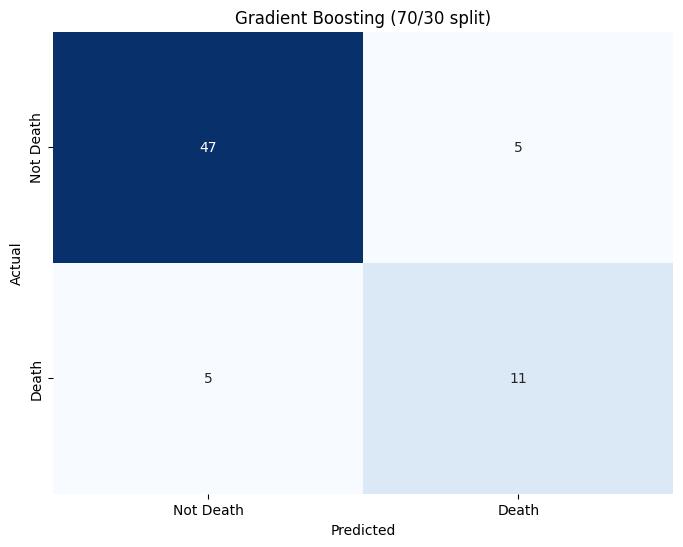

In [32]:
# Confusion matrix for RandomForestClassifier GridSearch
conf_mat_rf = [[47, 5], [5, 11]]

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Death', 'Death'],
            yticklabels=['Not Death', 'Death'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting (70/30 split)')
plt.show()


**Gradient Boosting 70/30 split:**

- True Negatives (TN): 47 Top Left Cases were correctly predicted as No Death.
- False Positives (FP): 5 Top Right Case was incorrectly predicted as Death.
- False Negatives (FN): 5 Bottom Left Cases were incorrectly predicted as No Death when actual is Death.
- True Positives (TP): 1 Bottom Right Cases were correctly predicted as Death.

Test - Accuracy: 0.8529, Precision: 0.8529, Recall: 0.8529, F1 Score: 0.8529

The precision of 0.8529 suggests that when it predicts an instance as 'Death', it is correct 85.29% of the time. The recall of 0.8529 indicates that it correctly identifies 85.29% of all actual 'Death' instances. The F1 score of 0.8529 confirms a good balance between precision and recall.

###Save Model and Predictions

In [33]:
# Make predictions on the test set using the Gradient Boosting model (70-30 split)
y_test_pred = gb_model_70_30.predict(X_test_70)  # Appropriate test data

# Save the predictions to a CSV file
predictions_df = pd.DataFrame({
    'True Labels': y_test_70,
    'Predictions': y_test_pred
})
predictions_df.to_csv('gradient_boosting_predictions_7030.csv', index=False)

# Save the Gradient Boosting model to a file
dump(gb_model_70_30, 'gradient_boosting_7030.joblib')

# Load the model from the file (for verification)
gb_model_loaded = load('gradient_boosting_7030.joblib')

print("Predictions saved to 'gradient_boosting_predictions_7030.csv'.")
print("Gradient Boosting model saved as 'gradient_boosting_7030.joblib'.")


Predictions saved to 'gradient_boosting_predictions_7030.csv'.
Gradient Boosting model saved as 'gradient_boosting_7030.joblib'.


## Summary of Findings

- **Dataset Overview:**
  - The dataset comprises 299 patients with 13 clinical variables, including demographic factors, clinical measurements, and health conditions.

- **Key Insights:**
  - **Demographics and Health Conditions:** The dataset predominantly includes adult male patients (64.88%), with significant proportions affected by anaemia (43%), diabetes (42%), and high blood pressure (35%).
  - **Clinical Measurements:** Notable averages include ejection fraction (mean ~38.08%), serum creatinine (mean ~1.39 mg/dL), serum sodium (mean ~136.63 mEq/L), and platelet count (mean ~263,358 kiloplatelets/mL), indicating variability across patients.
  - **Follow-up Period:** Patients were monitored for an average of ~130.26 days, offering insights into the duration of study follow-up.

- **Feature Importance:**
  - Through various feature selection methods, the following features were consistently identified as predictive of heart failure: 'ejection_fraction', 'serum_creatinine', and 'time'.

## Model Evaluation and Selection

- **Model Performance:**
  - **GradientBoostingClassifier 70/30 split:** This model achieved an accuracy of 85.29% with a precision of 85.29%, recall of 85.29%, and F1 score of 85.29%.
  - **LogisticRegression:** Consistent performance on test data but not as good as GradientBoostingClassifier.
  - **RandomForestClassifier:** Strong performance on training data, but shows a drop on test data, indicating potential overfitting.
- **Model Selection Rationale:**
  - GradientBoostingClassifier was selected as it appears to be the best model. It provides a strong balance between high recall and precision, with consistent performance on both training and test data. This balance is crucial for predicting death events, ensuring both high sensitivity and reasonable accuracy.

## Clinical Implications and Recommendations

- **Clinical Insights:**
  - The identified predictors can aid healthcare providers in prioritizing interventions and monitoring strategies for patients at higher risk of heart failure.
  - Examples of practical applications include personalized treatment plans based on patient demographics and clinical measurements.

## Limitations and Future Directions

- **Study Limitations:**
  - Potential limitations include the dataset's size and scope, as well as assumptions made during model training.
  - Further validation in diverse patient populations and incorporation of additional clinical variables could enhance model robustness.

- **Future Research Directions:**
  - Future studies could consider exploring additional advanced machine learning techniques or ensemble methods to further enhance predictive accuracy and generalize findings beyond the scope of this project.
  - Research focusing on real-time predictive modeling and integration with electronic health records could further enhance clinical decision support systems.


